## Step 1.) 🧐 Attention

In [24]:
# Import the pacakges
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [25]:
# Collection of the methods that can be reused
# Let's check for null values in a visual way
def calculate_fillrate(df):
    total_records = len(df)
    fill_rate = df.notna().mean() * 100
    num_of_notna = df.notna().sum()
    
    fill_rate_df = pd.DataFrame({
        'columns': df.columns,
        'fill_rate': fill_rate,
        'num_of_notna': num_of_notna,
        'total_records': total_records
    }).reset_index(drop=True)
    
    return fill_rate_df


def plot_categorical_pie_charts(df, nrows=None, ncols=None, title=None):
    
    # Check for the title
    if not title:
        title = "Categorical Columns Distribution"
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # If nrows and ncols are not provided, default to a single column layout
    if nrows is None or ncols is None:
        nrows = len(categorical_cols)
        ncols = 1
    
    # Create subplots with the specified number of rows and columns
    fig = make_subplots(
        rows=nrows, 
        cols=ncols, 
        subplot_titles=categorical_cols[:nrows*ncols], 
        specs=[[{'type': 'domain'}] * ncols] * nrows
    )
    
    # Add pie charts to subplots
    for i, col in enumerate(categorical_cols):
        row = (i // ncols) + 1
        col_pos = (i % ncols) + 1
        value_counts = df[col].value_counts()
        fig.add_trace(
            go.Pie(labels=value_counts.index, values=value_counts.values, name=col),
            row=row, col=col_pos
        )
        if i >= nrows * ncols - 1:
            break

    # Update layout
    fig.update_layout(height=300 * nrows, title_text=title, showlegend=False)
    fig.show()


def numerical_columns_only(df):
    
    # Select only numerical columns
    numerical_df = df.select_dtypes(include='number')
    
    return numerical_df

### Attention to Our Data

* There are `10002` rows in the dataset.
* `CreditScore`, `Age`, `Tenure`, `Balance`, and `NumOfProducts` are continuous features.
* `Surname`, `Geography`, and `Gender` are categorical features.
    * For `Surname`, there are 2932 unique surnames.
    * For `Geography` there are 3 countires: *France*, *Germany*, and *Spain*.
    * For `Card Type` there are 4 types: *DIAMOND*, *GOLD*, *SILVER*, *PLATINUM*
* It's a VERY CLEAN data with no null values.

In [26]:
# Import the data
data = pd.read_csv("data/Customer-Churn-Records.csv")
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [27]:
# What's the number of records?
data.shape[0]

10000

In [28]:
# Take a look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [29]:
# Unique values for each categorical columns

def distinct_values_for_non_numerical(df):
    # select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Get the unique values
    unique_values = {col: df[col].unique() for col in categorical_cols}

    for col, values in unique_values.items():
        print(f"Unique values in column '{col}': {values}")
    
distinct_values_for_non_numerical(data)

Unique values in column 'Surname': ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Unique values in column 'Geography': ['France' 'Spain' 'Germany']
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Card Type': ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [30]:
# Let's check for null values in a visual way
def calculate_fillrate(df):
    total_records = len(df)
    fill_rate = df.notna().mean() * 100
    num_of_notna = df.notna().sum()
    
    fill_rate_df = pd.DataFrame({
        'columns': df.columns,
        'fill_rate': fill_rate,
        'num_of_notna': num_of_notna,
        'total_records': total_records
    }).reset_index(drop=True)
    
    return fill_rate_df

fill_rate = calculate_fillrate(data)

fill_rate

columns  fill_rate  num_of_notna  total_records
0            RowNumber      100.0         10000          10000
1           CustomerId      100.0         10000          10000
2              Surname      100.0         10000          10000
3          CreditScore      100.0         10000          10000
4            Geography      100.0         10000          10000
5               Gender      100.0         10000          10000
6                  Age      100.0         10000          10000
7               Tenure      100.0         10000          10000
8              Balance      100.0         10000          10000
9        NumOfProducts      100.0         10000          10000
10           HasCrCard      100.0         10000          10000
11      IsActiveMember      100.0         10000          10000
12     EstimatedSalary      100.0         10000          10000
13              Exited      100.0         10000          10000
14            Complain      100.0         10000          10000
15  Satisfaction Score      100.0         10000          10000
16           Card Type      100.0         10000          10000
17        Point Earned      100.0         10000          10000

### Data Cleansing: Drop Irrelevant columns and  records with null values

In [31]:
# Let's drop RowNumber, CustomerId, and Surname columns.
drop_irrelevant_cols = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Cleanse the data by dropping the Null values
drop_null_data = drop_irrelevant_cols.dropna()

calculate_fillrate(drop_null_data)

columns  fill_rate  num_of_notna  total_records
0          CreditScore      100.0         10000          10000
1            Geography      100.0         10000          10000
2               Gender      100.0         10000          10000
3                  Age      100.0         10000          10000
4               Tenure      100.0         10000          10000
5              Balance      100.0         10000          10000
6        NumOfProducts      100.0         10000          10000
7            HasCrCard      100.0         10000          10000
8       IsActiveMember      100.0         10000          10000
9      EstimatedSalary      100.0         10000          10000
10              Exited      100.0         10000          10000
11            Complain      100.0         10000          10000
12  Satisfaction Score      100.0         10000          10000
13           Card Type      100.0         10000          10000
14        Point Earned      100.0         10000          10000

## Step 2.) 🎯 Purpose

Goal of our analysis is to:
1. **understand our customers**
2. **find out what are the features that affects the customer churn the most**.

## Step 3.) 📊 Process

Let's dive into the actual EDA!

Here, we are exploring the histogram of continuous variables to see if there are any skewness, and need of transformation.

Moreover, we are going to plot barcharts for the categorical variables, except the `Surname`, so see the ratio of each categories.


In [32]:
drop_null_data.describe(include='all')

CreditScore Geography Gender           Age        Tenure  \
count   10000.000000     10000  10000  10000.000000  10000.000000   
unique           NaN         3      2           NaN           NaN   
top              NaN    France   Male           NaN           NaN   
freq             NaN      5014   5457           NaN           NaN   
mean      650.528800       NaN    NaN     38.921800      5.012800   
std        96.653299       NaN    NaN     10.487806      2.892174   
min       350.000000       NaN    NaN     18.000000      0.000000   
25%       584.000000       NaN    NaN     32.000000      3.000000   
50%       652.000000       NaN    NaN     37.000000      5.000000   
75%       718.000000       NaN    NaN     44.000000      7.000000   
max       850.000000       NaN    NaN     92.000000     10.000000   

              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    10000.000000   10000.000000  10000.00000    10000.000000   
unique            NaN            NaN          NaN             NaN   
top               NaN            NaN          NaN             NaN   
freq              NaN            NaN          NaN             NaN   
mean     76485.889288       1.530200      0.70550        0.515100   
std      62397.405202       0.581654      0.45584        0.499797   
min          0.000000       1.000000      0.00000        0.000000   
25%          0.000000       1.000000      0.00000        0.000000   
50%      97198.540000       1.000000      1.00000        1.000000   
75%     127644.240000       2.000000      1.00000        1.000000   
max     250898.090000       4.000000      1.00000        1.000000   

        EstimatedSalary        Exited      Complain  Satisfaction Score  \
count      10000.000000  10000.000000  10000.000000        10000.000000   
unique              NaN           NaN           NaN                 NaN   
top                 NaN           NaN           NaN                 NaN   
freq                NaN           NaN           NaN                 NaN   
mean      100090.239881      0.203800      0.204400            3.013800   
std        57510.492818      0.402842      0.403283            1.405919   
min           11.580000      0.000000      0.000000            1.000000   
25%        51002.110000      0.000000      0.000000            2.000000   
50%       100193.915000      0.000000      0.000000            3.000000   
75%       149388.247500      0.000000      0.000000            4.000000   
max       199992.480000      1.000000      1.000000            5.000000   

       Card Type  Point Earned  
count      10000  10000.000000  
unique         4           NaN  
top      DIAMOND           NaN  
freq        2507           NaN  
mean         NaN    606.515100  
std          NaN    225.924839  
min          NaN    119.000000  
25%          NaN    410.000000  
50%          NaN    605.000000  
75%          NaN    801.000000  
max          NaN   1000.000000

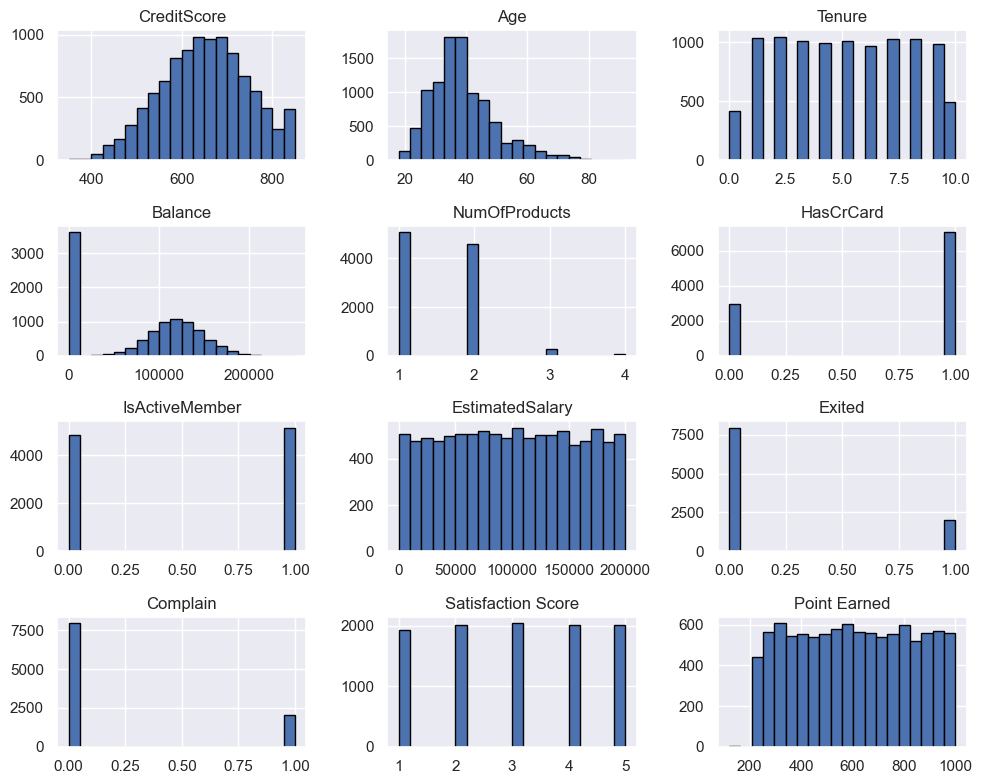

In [33]:
# Histogram of all the continous variables.
drop_null_data.hist(figsize=(10, 8), bins=20, edgecolor='black')

plt.tight_layout()
plt.show()

In [34]:
# Let's get the see the correlation of the columns for the target: Exited
numerical_columns_df = numerical_columns_only(drop_null_data)

means = numerical_columns_df.mean()
quantiles_10 = numerical_columns_df.quantile(0.05)
quantiles_90 = numerical_columns_df.quantile(0.95)

for col in numerical_columns_df.columns:
    fig = px.box(numerical_columns_df, x=col, title=f'Boxplot of {col} grouped by Exited')
    
    # Add a scatter trace for the mean line
    fig.add_trace(go.Scatter(
        x=[means[col], means[col]],
        # y=[means[col], means[col]],
        mode="lines",
        name="Average",
        line=dict(color='red', dash='dash')
    ))

    # Add a scatter trace for the 10th percentile line
    fig.add_trace(go.Scatter(
        x=[quantiles_10[col], quantiles_10[col]],
        mode="lines",
        name="10th Percentile",
        line=dict(color='blue', dash='dot')
    ))

    # Add a scatter trace for the 90th percentile line
    fig.add_trace(go.Scatter(
        x=[quantiles_90[col], quantiles_90[col]],
        mode="lines",
        name="90th Percentile",
        line=dict(color='green', dash='dot')
    ))
    
    fig.update_layout(xaxis_title=col)
    
    fig.show()

In [35]:
# Let's get the see the correlation of the columns for the target: Exited
numerical_columns_df = numerical_columns_only(drop_null_data)

for col in numerical_columns_df.columns:
    fig = px.box(numerical_columns_df, x="Exited", y=col, title=f'Boxplot of {col} grouped by Exited')
    fig.update_layout(xaxis_title='Exited', yaxis_title=col)
    fig.show()

In [36]:
# Let's see the pie charts for all the categorical columns and the binary columns as well
binary_to_categorical = drop_null_data.copy()
columns_to_convert = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
binary_to_categorical[columns_to_convert] = binary_to_categorical[columns_to_convert].astype('category')

plot_categorical_pie_charts(binary_to_categorical, 3, 3, "Overall Ratio")


### Analysis
1. `CreditScore` is slightly skewed to left with mean of 650.53, stand deviation of 96.63. median value for this column is 652.00
2. `Balance` has a lot of 0s. Therefore, the shape of distribution is weird. We need to transform the column.
3. We see that the `Geography` column has 50% of *France*. We should be aware of this when creating training set and testing set so that we can avoid the sampling error.
4. Intuitively, we already know that the `Complain` column would be highly correlated to our target column, `Exited`. We see that the percentage for those who complained is **exactly the same for those who exited**.
    1. Further Analysis shows that out of those who exited, ***99% of customers has compained***
5. Unlike the total sample shows 50.8% and 45.9%, and those who did not exited showing 46.2% and 53.3% for `NumOfProducts = 1` and `NumOfProducts = 2`, respectively, those who exited has the percentage of 69.1% and 17.1% for `NumOfProducts = 1` and `NumOfProducts = 2`, respectively. From the data, we can conclude that there is a higher probability of customers exiting, when they've only purchased one product through the bank.
6. There is a higher chance of customers exiting when the customers are inactive.
7. `Age` is skewed to the right, especially for those who did not exited. we could build a hypothesis, "older the people's age, less likely for them to leave the bank".
8. When looking at the ratio of the nationality of the customers regardless of them exited or not, majority of our customers are from France. However, when we dive into those who exited, about 40 percent of the customers are from Germany. Likewise, about 40% of the customers are from France and rest of the customers are from Spain. This indicates that the nationality is not a negligible factor when analyzing the churn of the customers.

### Conclusion
* Transformation on data with outliers and skewness (`Age`, `Balance`, and etc)
* Feed different models, validate them, and compare!

### Pie Chart for Categorical / Binary Variables!

From the section below, we plot the pie charts to see the ratio of the features

In [37]:
# Split the data into two: exited or not.
binary_to_categorical_exited = binary_to_categorical[binary_to_categorical['Exited'] == 1]
binary_to_categorical_not_exited = binary_to_categorical[binary_to_categorical['Exited'] == 0]

In [38]:
plot_categorical_pie_charts(binary_to_categorical_exited, 3, 3, "Ratio for Exited = 1")

In [39]:
plot_categorical_pie_charts(binary_to_categorical_not_exited, 3, 3, "Ratio for Exited = 0")

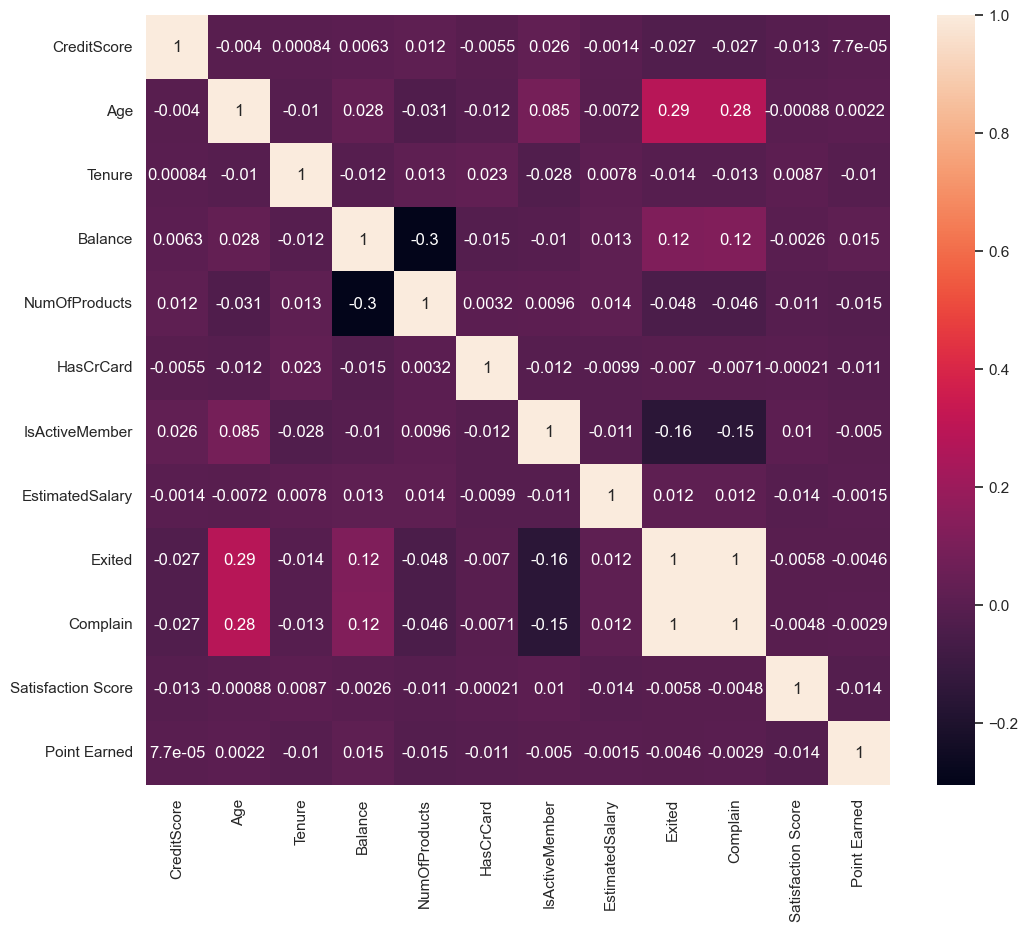

In [45]:
plt.figure(figsize=(12, 10))

sns.heatmap(numerical_columns_df.corr(), annot=True)

plt.show()

### Box Plot for Continuous Variables!

## Step 2. Data Transformation Pipeline!

This step, we build a sklearn data preparation pipeline!
We are going transform our data so that it can be a machine-learning friendly data.

1. Convert the categorical values to dummy variables (OneHotEncoder)
2. Standardize the variables


Moreover, Note that we have a class imbalance in our target variable (*about 80% did not exited whereas 20% did*).

We are going to handle the imbalance by ***over-sampling*** the minor class.

### ToDo
1. 일반 Train_Test_Split으로 그냥 모델 쭉 돌려서 Metric 뽑아보기
2. Stratified Sampling 사용해서 모델 쭉 돌려서 Metric 뽑아보기
3. Imbalance Handling 하는 것 사용해서 모델 쭉 돌리고 Metric 뽑아보기

In [41]:
# split our data into X and y
X = drop_null_data.drop(columns=["Exited"])
y = drop_null_data['Exited']

# Get categorical columns and convert them
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [42]:
X.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [43]:
# 1. Deal with Card Type
card_type_feature = ['Card Type']
card_type_transformer = OrdinalEncoder(categories=[['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']])


# 2. Rest of the categorical values
categorical_features = ['Geography', 'Gender']
categorical_transformer = OneHotEncoder(drop='first')

# 3. Numerical Values
numeric_features = X.select_dtypes(include='number').columns.to_list()
numeric_imputer = SimpleImputer(strategy = "median")

# 4. Create a Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('card', card_type_transformer, card_type_feature),
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_imputer, numeric_features)
    ],
    remainder='passthrough'
)


full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler())
    ]
)

NameError: name 'OrdinalEncoder' is not defined

In [ ]:
X_transformed = full_pipeline.fit_transform(X)

# Retrieve column names

onehot_encoder = full_pipeline.named_steps['preprocessor'].named_transformers_['cat']
onehot_columns = onehot_encoder.get_feature_names_out(categorical_features).tolist()

transformed_columns = card_type_feature + onehot_columns + numeric_features

# X_transformed.shape[1]

X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)

X_transformed_df.head()


Card Type  Geography_Germany  Geography_Spain  Gender_Male  CreditScore  \
0   1.340157          -0.578736        -0.573809    -1.095988    -0.326221   
1   1.340157          -0.578736         1.742740    -1.095988    -0.440036   
2   1.340157          -0.578736        -0.573809    -1.095988    -1.536794   
3  -0.448269          -0.578736        -0.573809    -1.095988     0.501521   
4  -0.448269          -0.578736         1.742740    -1.095988     2.063884   

        Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  0.293517 -1.041760 -1.225848      -0.911583   0.646092        0.970243   
1  0.198164 -1.387538  0.117350      -0.911583  -1.547768        0.970243   
2  0.293517  1.032908  1.333053       2.527057   0.646092       -1.030670   
3  0.007457 -1.387538 -1.225848       0.807737  -1.547768       -1.030670   
4  0.388871 -1.041760  0.785728      -0.911583   0.646092        0.970243   

   EstimatedSalary  Complain  Satisfaction Score  Point Earned  
0         0.021886  1.972908           -0.721130     -0.630839  
1         0.216534  1.972908           -0.009816     -0.666251  
2         0.240687  1.972908           -0.009816     -1.015942  
3        -0.108918 -0.506866            1.412812     -1.135457  
4        -0.365276 -0.506866            1.412812     -0.803472

In [ ]:
# Train Test Split!

X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

In [ ]:
# Let us train some models based on the training dataset!
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      0.98      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Classification Report for SGD Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      20

## ToDo

1. Train Validation Test로 Split하기
2. Confusion Matrix 구해보기
3. ROC_Curve 구해보기
4. Precision V.S. Recall 데이터 Plot해보기!